<a href="https://colab.research.google.com/github/gilderson/desafio_telecomx/blob/main/Desafio_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
dados = pd.read_json('/content/TelecomX_Data.json')

In [5]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
customer_details = pd.json_normalize(dados['customer'])
dados = pd.concat([dados.drop('customer', axis=1), customer_details], axis=1)

phone_details = pd.json_normalize(dados['phone'])
dados = pd.concat([dados.drop('phone', axis=1), phone_details], axis=1)

internet_details = pd.json_normalize(dados['internet'])
dados = pd.concat([dados.drop('internet', axis=1), internet_details], axis=1)

account_details = pd.json_normalize(dados['account'])
dados = pd.concat([dados.drop('account', axis=1), account_details], axis=1)

In [7]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
dados['Charges.Total'] = dados['Charges.Total'].apply(lambda x: x.replace(',', '').strip())
dados['Charges.Total'] = dados['Charges.Total'].replace('', np.nan)
dados['Charges.Total'] = dados['Charges.Total'].astype(float)

In [10]:
dados[dados['Charges.Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [11]:
# Removendo valores nulos
dados = dados.dropna(subset=['Charges.Total'])

In [12]:
# Criando uma nova coluna para
dados['Contas_Diarias'] = dados['Charges.Monthly'] / 30

/tmp/ipython-input-4253989415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Contas_Diarias'] = dados['Charges.Monthly'] / 30


In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

In [14]:
dados.columns = dados.columns.str.replace('customerID','id_cliente')
dados.columns = dados.columns.str.replace('Churn','evasao') #troquei o termo por um mais proximo do usual no Brasil
dados.columns = dados.columns.str.replace('gender','genero')
dados.columns = dados.columns.str.replace('SeniorCitizen','acima_de_64_anos')
dados.columns = dados.columns.str.replace('Partner','conjuge')
dados.columns = dados.columns.str.replace('Dependents','dependentes')
dados.columns = dados.columns.str.replace('tenure','meses_de_contrato')
dados.columns = dados.columns.str.replace('PhoneService','servico_telefone')
dados.columns = dados.columns.str.replace('MultipleLines','multiplas_linhas')
dados.columns = dados.columns.str.replace('InternetService','servico_internet')
dados.columns = dados.columns.str.replace('OnlineSecurity','seguranca_online')
dados.columns = dados.columns.str.replace('OnlineBackup','backup_online')
dados.columns = dados.columns.str.replace('DeviceProtection','protecao_dispositivo')
dados.columns = dados.columns.str.replace('TechSupport','suporte_tecnico')
dados.columns = dados.columns.str.replace('StreamingTV','streaming_tv')
dados.columns = dados.columns.str.replace('StreamingMovies','streaming_filmes')
dados.columns = dados.columns.str.replace('Contract','contrato')
dados.columns = dados.columns.str.replace('PaperlessBilling','faturamento_online')
dados.columns = dados.columns.str.replace('PaymentMethod','metodo_pagamento')
dados.columns = dados.columns.str.replace('Charges.Monthly', 'valor_mensalidade')
dados.columns = dados.columns.str.replace('Charges.Total', 'valor_total')
dados.columns = dados.columns.str.replace('Contas_Diarias', 'contas_diaria')

In [15]:
sorted_months = np.sort(dados['meses_de_contrato'].unique())
print(sorted_months)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]


In [16]:
dados['evasao'] = dados['evasao'].replace({'No': 0, 'Yes': 1})

/tmp/ipython-input-3260744353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['evasao'] = dados['evasao'].replace({'No': 0, 'Yes': 1})


In [17]:
dados['evasao'] = dados['evasao'].replace('',0)

/tmp/ipython-input-1631012925.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['evasao'] = dados['evasao'].replace('',0)
/tmp/ipython-input-1631012925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['evasao'] = dados['evasao'].replace('',0)


In [18]:
dados['evasao'] = dados['evasao'].astype('int64')

/tmp/ipython-input-2603538028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['evasao'] = dados['evasao'].astype('int64')


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [20]:
dados['evasao'].info()

<class 'pandas.core.series.Series'>
Index: 7256 entries, 0 to 7266
Series name: evasao
Non-Null Count  Dtype
--------------  -----
7256 non-null   int64
dtypes: int64(1)
memory usage: 113.4 KB


In [21]:
groupby_evasao = dados.groupby('evasao').size()

In [22]:
groupby_evasao = groupby_evasao.rename({0: 'Ativos', 1: 'Evasão'})

In [23]:
df_percentual_evasao = groupby_evasao / groupby_evasao.sum() * 100
df_percentual_evasao

,0
evasao,
Ativos,74.242007
Evasão,25.757993


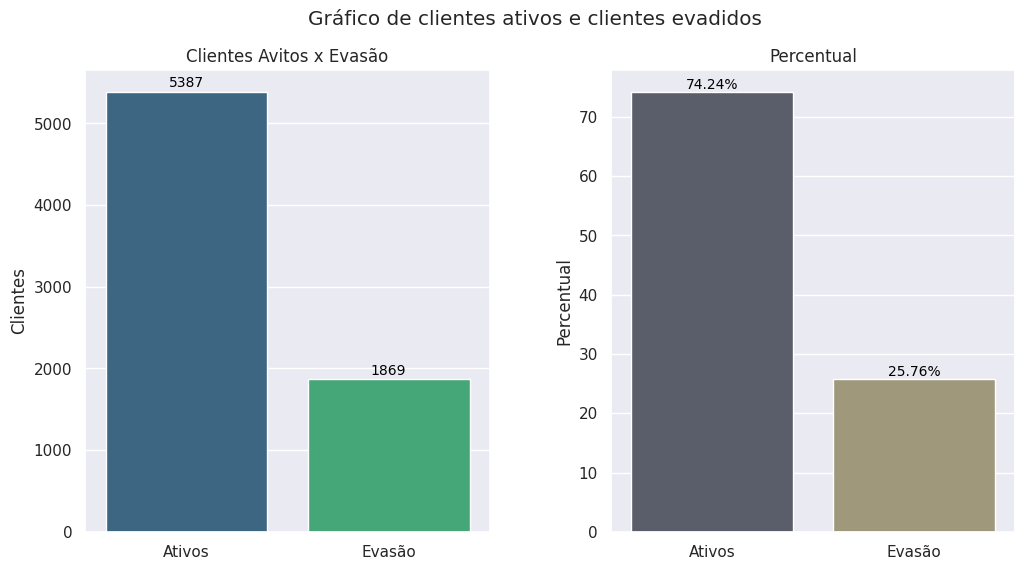

In [24]:
#Grafico para verificar o total de clientes evadidos e clientes ativos
fig, axs = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(hspace=0.8, wspace = 0.3)
fig.suptitle('Gráfico de clientes ativos e clientes evadidos')

axs[0] = sns.barplot(x=groupby_evasao.index, y=groupby_evasao.values, ax=axs[0], palette='viridis',  hue=groupby_evasao.index, legend=False)
axs[0].set(title = 'Clientes Avitos x Evasão'
       , xlabel = ''
       , ylabel = 'Clientes'
       )
for i, v in enumerate(groupby_evasao.values):
  axs[0].text(i, v + 20, str(v), color='black', fontsize=10, ha='center', va='bottom')

axs[1] = sns.barplot(x=df_percentual_evasao.index, y=df_percentual_evasao.values, ax=axs[1], palette='cividis',  hue=df_percentual_evasao.index, legend=False, orient='v')
axs[1].set(title = 'Percentual'
       , xlabel = ''
       , ylabel = 'Percentual'
       )
for i, v in enumerate(df_percentual_evasao.values):
  axs[1].text(i, v + 0, str(round(v,2)) + '%', color='black', fontsize=10, ha='center', va='bottom')

plt.show()

In [25]:
dados_evadidos = dados[dados['evasao'] == 1].copy()

In [26]:
dados_evadidos

,id_cliente,evasao,genero,acima_de_64_anos,conjuge,dependentes,meses_de_contrato,servico_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,contrato,faturamento_online,metodo_pagamento,valor_mensalidade,valor_total,contas_diaria
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
18,0022-TCJCI,1,Male,1,No,No,45,Yes,No,DSL,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.50,2.090000
19,0023-HGHWL,1,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,1,Male,1,No,No,21,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.30,3.226667
7246,9965-YOKZB,1,Male,1,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.85,790.15,2.795000
7260,9985-MWVIX,1,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,2.338333
7261,9986-BONCE,1,Female,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,0.698333


In [27]:
groupby_acima_de_64_anos = dados_evadidos.groupby('acima_de_64_anos').size()

In [28]:
groupby_acima_de_64_anos = groupby_acima_de_64_anos.rename({0: '> 64 anos', 1: '65 <'})

In [29]:
groupby_genero = dados_evadidos.groupby('genero').size()
groupby_genero = groupby_genero.rename({'Female': 'Mulher', 'Male': 'Homem'})

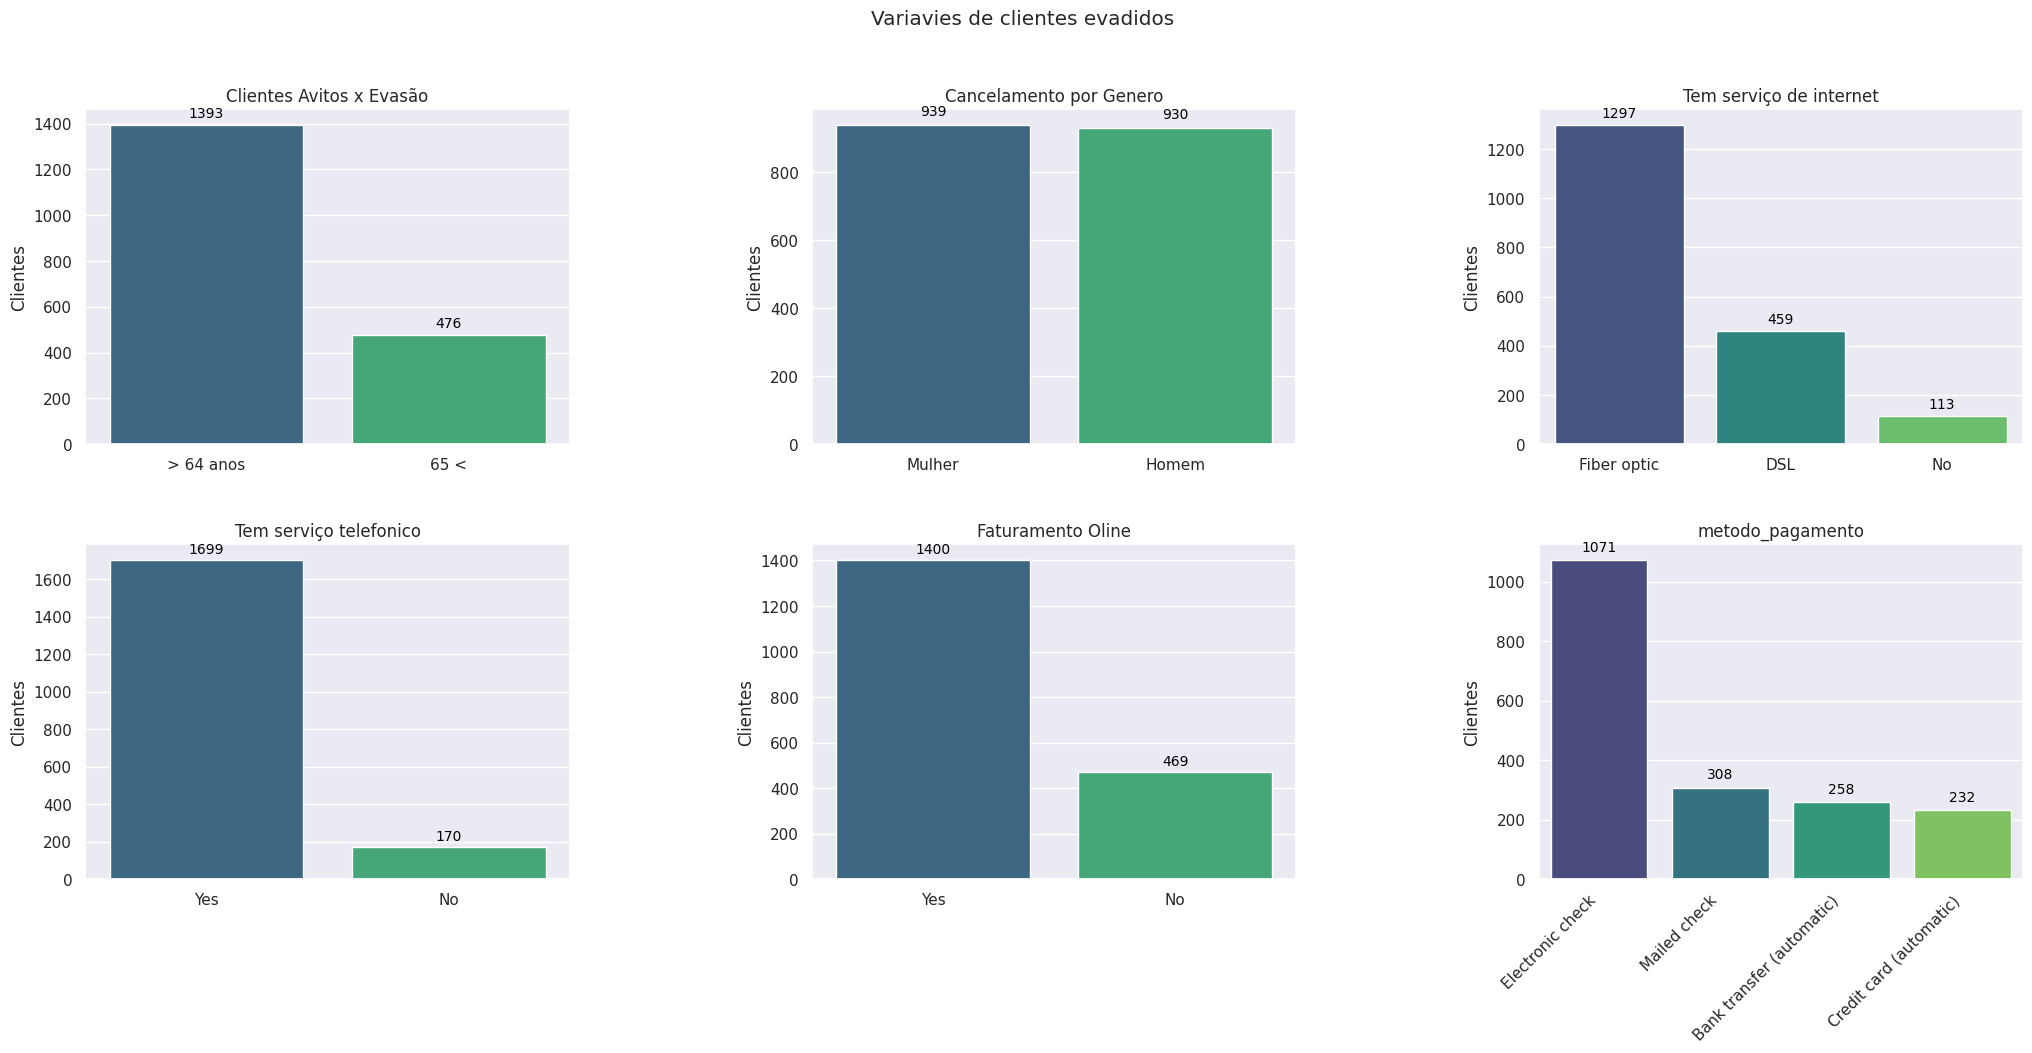

In [30]:
# Gerando os gráficos para avaliar cancelamentos.

fig, axs = plt.subplots(2,3, figsize=(25,10))
fig.subplots_adjust(hspace=0.3, wspace = 0.5)
fig.suptitle('Variavies de clientes evadidos')

axs[0,0] = sns.barplot(x=groupby_acima_de_64_anos.index, y=groupby_acima_de_64_anos.values, ax=axs[0,0], palette='viridis',  hue=groupby_acima_de_64_anos.index, legend=False)
axs[0,0].set(title = 'Clientes Avitos x Evasão'
       , xlabel = ''
       , ylabel = 'Clientes'
       )
for i, v in enumerate(groupby_acima_de_64_anos.values):
  axs[0,0].text(i, v + 20, str(v), color='black', fontsize=10, ha='center', va='bottom')

axs[0,1] = sns.barplot(x=groupby_genero.index, y=groupby_genero.values, ax=axs[0,1], palette='viridis',  hue=groupby_genero.index, legend=False)
axs[0,1].set(title = 'Cancelamento por Genero'
       , xlabel = ''
       , ylabel = 'Clientes'
       )

for i, v in enumerate(groupby_genero.values):
  axs[0,1].text(i, v + 20, str(v), color='black', fontsize=10, ha='center', va='bottom')

axs[1,0] = sns.barplot(x=dados_evadidos['servico_telefone'].value_counts().index, y=dados_evadidos['servico_telefone'].value_counts().values, ax=axs[1,0], palette='viridis',  hue=dados_evadidos['servico_telefone'].value_counts().index, legend=False)
axs[1,0].set(title = 'Tem serviço telefonico'
       , xlabel = ''
       , ylabel = 'Clientes'
       )

for i, v in enumerate(dados_evadidos['servico_telefone'].value_counts().values):
  axs[1,0].text(i, v + 20, str(v), color='black', fontsize=10, ha='center', va='bottom')

axs[0,2] = sns.barplot(x=  dados_evadidos['servico_internet'].value_counts().index, y=dados_evadidos['servico_internet'].value_counts().values, ax=axs[0,2], palette='viridis',  hue=dados_evadidos['servico_internet'].value_counts().index, legend=False)
axs[0,2].set(title = 'Tem serviço de internet'
       , xlabel = ''
       , ylabel = 'Clientes'
       )

for i, v in enumerate(dados_evadidos['servico_internet'].value_counts().values):
  axs[0,2].text(i, v + 20, str(v), color='black', fontsize=10, ha='center', va='bottom')


axs[1,1]= sns.barplot(x=dados_evadidos['faturamento_online'].value_counts().index, y=dados_evadidos['faturamento_online'].value_counts().values, ax=axs[1,1], palette='viridis',  hue=dados_evadidos['faturamento_online'].value_counts().index, legend=False)
axs[1,1].set(title = 'Faturamento Oline'
       , xlabel = ''
       , ylabel = 'Clientes'
       )

for i, v in enumerate(dados_evadidos['faturamento_online'].value_counts().values):
  axs[1,1].text(i, v + 20, str(v), color='black', fontsize=10, ha='center', va='bottom')


axs[1,2]= sns.barplot(x=dados_evadidos['metodo_pagamento'].value_counts().index, y=dados_evadidos['metodo_pagamento'].value_counts().values, ax=axs[1,2], palette='viridis',  hue=dados_evadidos['metodo_pagamento'].value_counts().index, legend=False, orient='v')
locs, labels = axs[1,2].get_xticks(), axs[1,2].get_xticklabels()
axs[1,2].set_xticks(locs)
axs[1,2].set_xticklabels(axs[1,2].get_xticklabels(), rotation=45, ha='right')
axs[1,2].set(title = 'metodo_pagamento'
       , xlabel = ''
       , ylabel = 'Clientes'
       )

for i, v in enumerate(dados_evadidos['metodo_pagamento'].value_counts().values):
  axs[1,2].text(i, v + 20, str(v), color='black', fontsize=10, ha='center', va='bottom')



plt.show()

In [31]:
df_meses = dados_evadidos.groupby('meses_de_contrato').size()

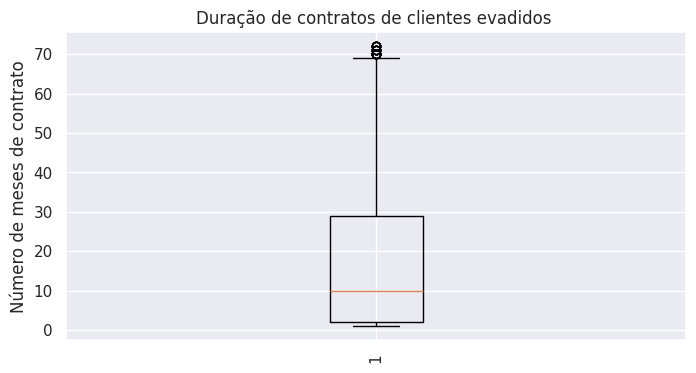

In [32]:
fig, ax = plt.subplots(figsize=(8,4))
fig.subplots_adjust(hspace=0.8, wspace = 0.3)
plt.boxplot(dados_evadidos['meses_de_contrato'])
plt.xticks(rotation=90)
ax.set(title = 'Duração de contratos de clientes evadidos '
       , xlabel = ''
       , ylabel = 'Número de meses de contrato'
       )
plt.show()

In [33]:
round(dados_evadidos.drop(columns=['evasao']).describe(), 2)

,acima_de_64_anos,meses_de_contrato,valor_mensalidade,valor_total,contas_diaria
count,1869.00,1869.00,1869.00,1869.00,1869.00
mean,0.25,17.98,74.44,1531.80,2.48
std,0.44,19.53,24.67,1890.82,0.82
min,0.00,1.00,18.85,18.85,0.63
25%,0.00,2.00,56.15,134.50,1.87
50%,0.00,10.00,79.65,703.55,2.66
75%,1.00,29.00,94.20,2331.30,3.14
max,1.00,72.00,118.35,8684.80,3.94


In [34]:
dados_evadidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            1869 non-null   object 
 1   evasao                1869 non-null   int64  
 2   genero                1869 non-null   object 
 3   acima_de_64_anos      1869 non-null   int64  
 4   conjuge               1869 non-null   object 
 5   dependentes           1869 non-null   object 
 6   meses_de_contrato     1869 non-null   int64  
 7   servico_telefone      1869 non-null   object 
 8   multiplas_linhas      1869 non-null   object 
 9   servico_internet      1869 non-null   object 
 10  seguranca_online      1869 non-null   object 
 11  backup_online         1869 non-null   object 
 12  protecao_dispositivo  1869 non-null   object 
 13  suporte_tecnico       1869 non-null   object 
 14  streaming_tv          1869 non-null   object 
 15  streaming_filmes      1869

In [35]:
correlacao_colunas = ['servico_telefone', 'multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes']
dados_evadidos['total_servicos'] = (dados_evadidos[correlacao_colunas] != 'No').sum(axis=1)

In [36]:
dados_evadidos.head()

,id_cliente,evasao,genero,acima_de_64_anos,conjuge,dependentes,meses_de_contrato,servico_telefone,multiplas_linhas,servico_internet,...,suporte_tecnico,streaming_tv,streaming_filmes,contrato,faturamento_online,metodo_pagamento,valor_mensalidade,valor_total,contas_diaria,total_servicos
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,3
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,6
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,4
18,0022-TCJCI,1,Male,1,No,No,45,Yes,No,DSL,...,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.50,2.090000,5
19,0023-HGHWL,1,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.10,0.836667,2


In [37]:
correlacao_colunas = ['servico_telefone', 'multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes']
dados['total_servicos'] = (dados[correlacao_colunas] != 'No').sum(axis=1)

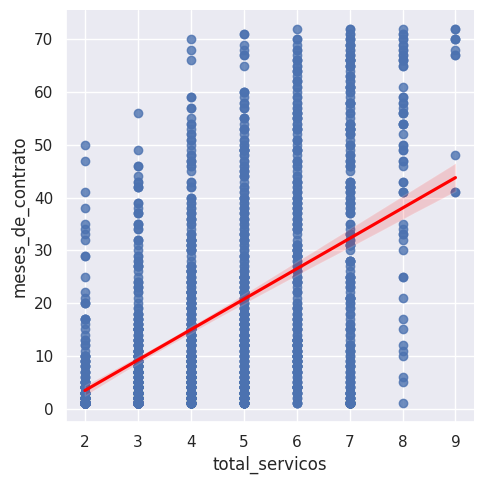

In [43]:
sns.lmplot(x='total_servicos', y='meses_de_contrato', data=dados_evadidos, line_kws={'color': 'red'})
plt.show()

                total_servicos    evasao
total_servicos        1.000000 -0.315824
evasao               -0.315824  1.000000


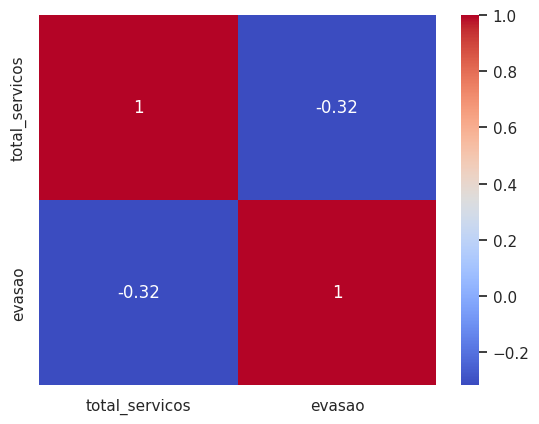

In [56]:
correlacao_evasao_servico = dados[['total_servicos', 'evasao']].corr()
print(correlacao_evasao_servico)

sns.heatmap(correlacao_evasao_servico, annot=True, cmap='coolwarm')
plt.show()

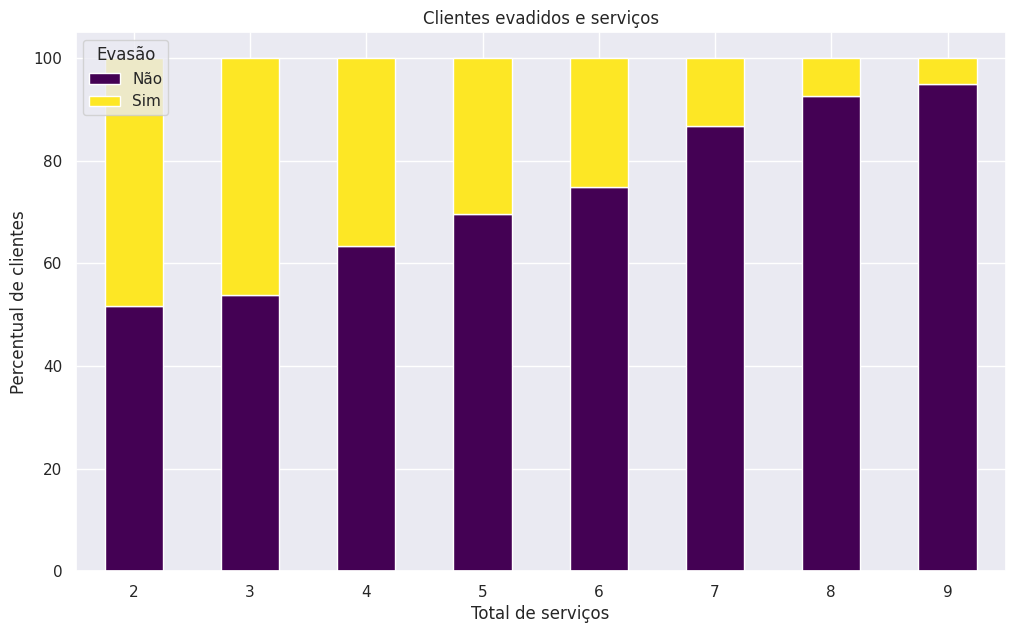

In [59]:
cross_tab = pd.crosstab(dados['total_servicos'], dados['evasao'], normalize='index') * 100

cross_tab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 7))

plt.title('Clientes evadidos e serviços')
plt.xlabel('Total de serviços')
plt.ylabel('Percentual de clientes')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.xticks(rotation=0)
plt.show()

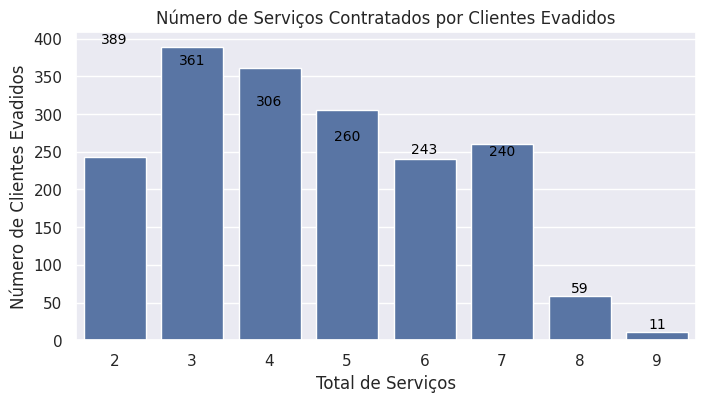

In [39]:
fig, ax = plt.subplots(figsize=(8,4))
fig.subplots_adjust(hspace=0.8, wspace = 0.3)

servicos_counts = dados_evadidos['total_servicos'].value_counts()
sns.barplot(x=servicos_counts.index, y=servicos_counts.values)

ax.set(title='Número de Serviços Contratados por Clientes Evadidos',
       xlabel='Total de Serviços',
       ylabel='Número de Clientes Evadidos')


for i, v in enumerate(servicos_counts.values):
    ax.text(i, v + 1, str(v), color='black', fontsize=10, ha='center', va='bottom')

plt.show()

Esse relatório tem por objetivo analisar o motivo dos cancelamentos dos clientes e seus impactos.

O arquivo TelecomX_Data.json foi importado para Google Colaby, foi utilizado o pd.read_json para realizar a tarefa. Foi feito ajuste no dataframe dados, foram removidos linhas que tinham valores nulos(NaN), pois pela quantidade foi visto que seriam irrelevantes para o estudo em geral. Correção do tipo de dados da coluna Charges.Total (valor_total) para flot.

Foram gerados graficos para direcionar na problematica, o grafico abaixo mostra o perfil medio dos clientes que cancelaram o contrato.

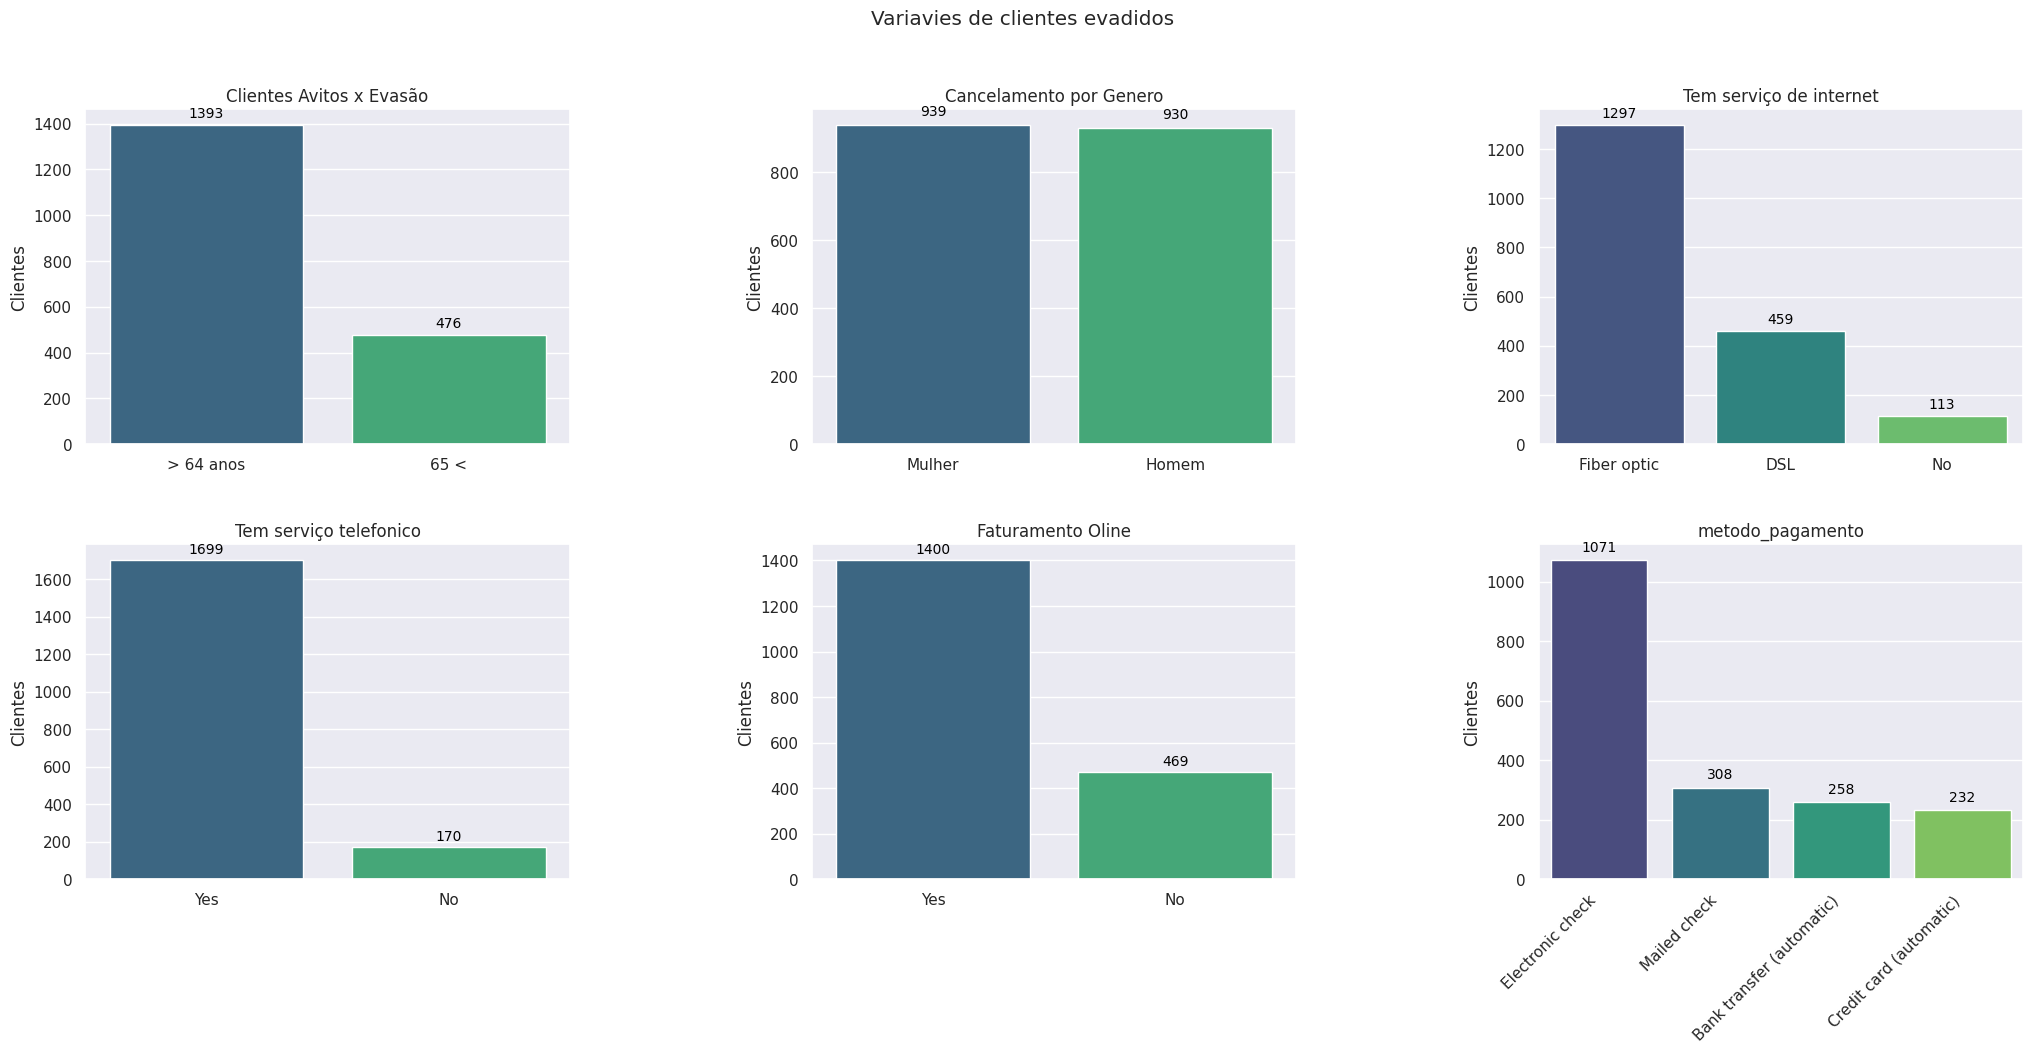

Analisamos que os graficos mostram que os usuarios com menos serviços acabam cancelando os serviços e até em menos tempo.
É necessário procurar vender mais serviços complementares para os clientes terem serviços mais completos e fidelizados.